In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import requests
import unicodedata
from tqdm import tqdm
from bs4 import BeautifulSoup

In [2]:
correct_answers = pd.DataFrame(columns=['question', 'answer'])
correct_answers['question'] = [
    'Timestamp',
    'Email Address',
    'Are you answering this survey before or after viewing the provided website? ',
    'Please enter your major(s) and minor(s) below: ',
    'How would you rate your understanding of language endangerment?',
    'What is your native language?List multiple, if applicable. \n\nNote: A native language is one you are exposed to from birth (or early childhood) during what linguists refer to as the critical period, which ends roughly at the beginning of puberty. ',
    'Are you an international student?',
    'How many languages do you think are presently spoken in the world?',
    'How many endangered or extinct languages do you think are in the world?',
    "Which of the following labels can be used to describe a language's status?",
    'Do you believe there are over 100 endangered languages in the United States?',
    'If you answered yes to the previous question, what region of the United States would you expect endangered languages to be most prominent?',
    'Do you think that any region in the world has a high concentration of endangered or extinct languages? If so, why? ',
    "If you've noticed any improvements to my website you think I should make, please feel free to list them below: "
]
correct_answers['answer'] = [
    None,
    None,
    ['Before', 'After'],
    None,
    ['Very Poor', 'Poor', 'Fair', 'Good', 'Very Good'],
    None,
    ['Yes', 'No'],
    'between 5,000 - 10,000 languages',
    'between 1,000 - 5,000 languages',
    ['Endangered', 'Vulnerable', 'Definitely Endangered', 'Severely Endangered', 'Critically Endangered', 'Extinct'],
    'Yes',
    ['The Rocky Mountains', 'Southwest', 'West Coast'],
    None,
    None
]


# correct_answers

In [3]:
impact_data = pd.read_csv('../csv_files/Language Status Visualization Impact Survey Responses.csv')
# impact_data

In [4]:
quantitative_columns = [
    'How would you rate your understanding of language endangerment?',
    'Are you an international student?',
    'How many languages do you think are presently spoken in the world?',
    'How many endangered or extinct languages do you think are in the world?',
    "Which of the following labels can be used to describe a language's status?",
    'Do you believe there are over 100 endangered languages in the United States?',
    'If you answered yes to the previous question, what region of the United States would you expect endangered languages to be most prominent?',
]

# fig, axs = plt.subplots(1, 2, figsize=(20, 20))

before_responses = impact_data[impact_data['Are you answering this survey before or after viewing the provided website? '] == 'Before']
after_responses = impact_data[impact_data['Are you answering this survey before or after viewing the provided website? '] == 'After']

/var/folders/l9/y8y3rmys2sl93tzzph3dl7jw0000gr/T/ipykernel_48558/817600204.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', '', '<1,000', '', 'between 1,000 - 5,000', '', 'between 5,000 - 10,000', '', '> 10,000']) #my line


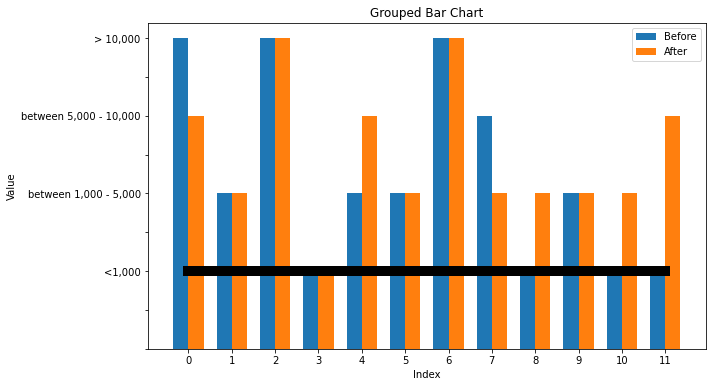

In [17]:
value_mapping = { '< 1,000 languages': 1, \
                 'between 1,000 - 5,000 languages': 2, \
                    'between 5,000 - 10,000 languages': 3, \
                    '> 10,000 languages': 4 }

a= before_responses['How many endangered or extinct languages do you think are in the world?']
b= after_responses['How many endangered or extinct languages do you think are in the world?']

a.index = range(len(a))
b.index = range(len(b))

a2 = a.replace(value_mapping)
b2 = b.replace(value_mapping)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define the x-axis positions
x = np.arange(len(a))

# Define the width of each bar
width = 0.35

# Plot the bars for 'a'
ax.bar(x - width/2, a2, width, label='Before')

# Plot the bars for 'b'
ax.bar(x + width/2, b2, width, label='After')

# Add labels, title, and legend
ax.set_xlabel('Index')
# ax.set_yticks(ticks = [1, 2, 3, 4], labels = ['<1,000', 'between 1,000 - 5,000', 'between 5,000 - 10,000', '> 10,000'])

# ax.set_yticks([1, 2, 3, 4]) #my line: will move ticks up but doesn't change order or limits
ax.set_yticklabels(['', '', '<1,000', '', 'between 1,000 - 5,000', '', 'between 5,000 - 10,000', '', '> 10,000']) #my line
ax.set_ylabel('Value')
ax.set_title('Grouped Bar Chart')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend()

#make horizontal line at y=1
plt.plot(range(0, 12), [1]*12, color='black', linewidth=10)

# Show the plot
plt.show()
# plt.hist(b, bins=10, alpha=0.5, label='After', ax=axs[1])

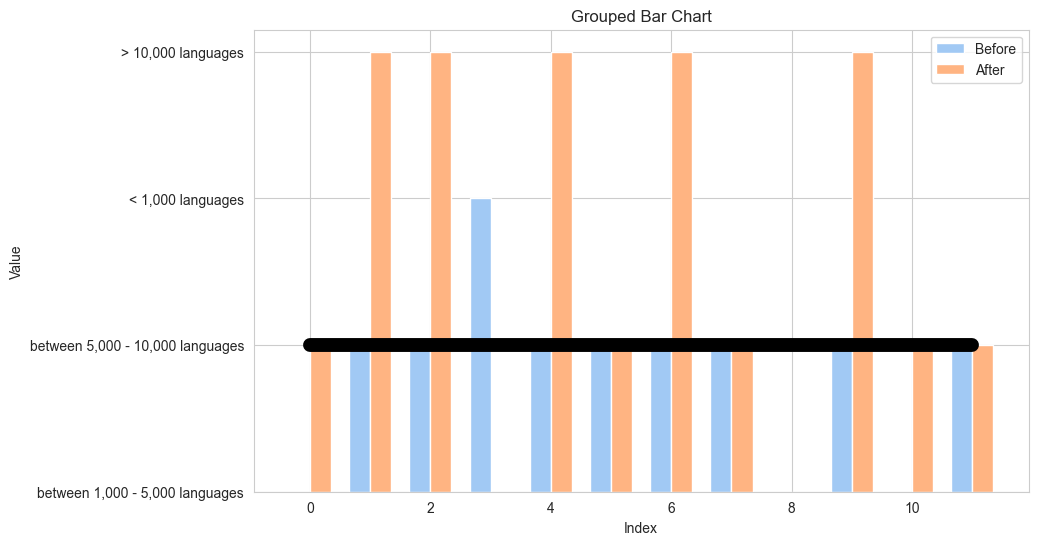

In [154]:
a= before_responses['How many languages do you think are presently spoken in the world?']
# plt.hist(a, bins=10, alpha=0.5, label='Before', ax=axs[0])
b= after_responses['How many languages do you think are presently spoken in the world?']

a.index = range(len(a))
b.index = range(len(b))

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define the x-axis positions
x = np.arange(len(a))

# Define the width of each bar
width = 0.35

# Plot the bars for 'a'
ax.bar(x - width/2, a, width, label='Before')

# Plot the bars for 'b'
ax.bar(x + width/2, b, width, label='After')

# Add labels, title, and legend
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('Grouped Bar Chart')
# ax.set_xticks(x)
# ax.set_xticklabels(x)
ax.legend()

#make horizontal line at y=1

plt.plot(range(0, 12), [1]*12, color='black', linewidth=10)

# Show the plot
plt.show()
# plt.hist(b, bins=10, alpha=0.5, label='After', ax=axs[1])

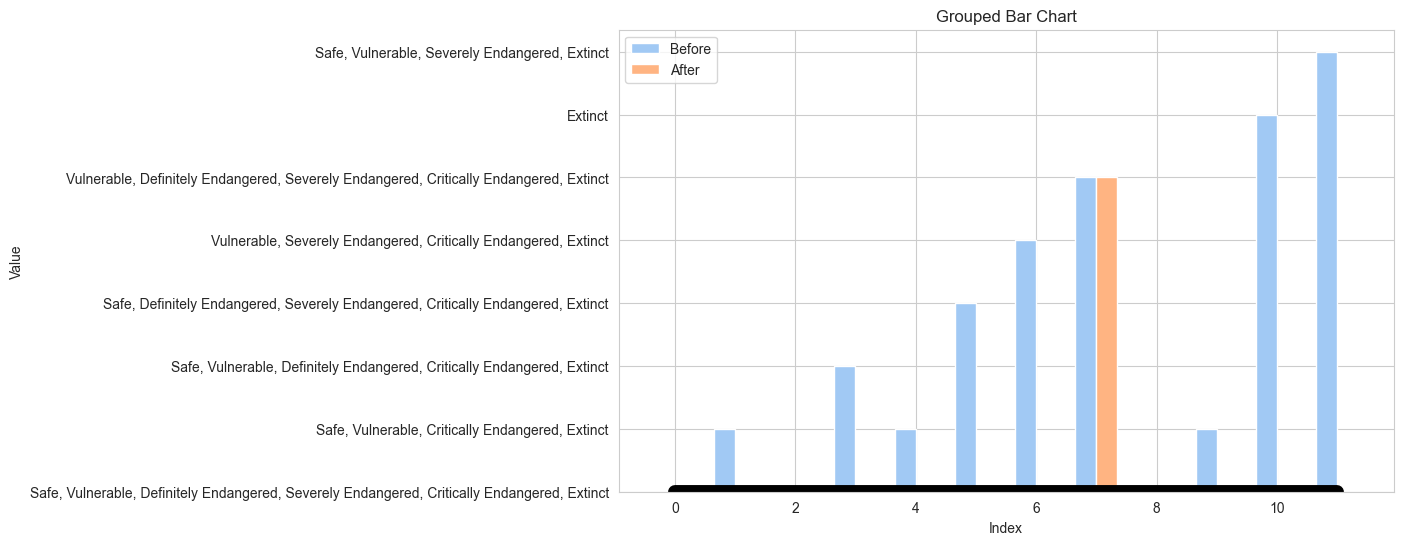

In [155]:
a= before_responses['Which of the following labels can be used to describe a language\'s status?']
# plt.hist(a, bins=10, alpha=0.5, label='Before', ax=axs[0])
b= after_responses['Which of the following labels can be used to describe a language\'s status?']

a.index = range(len(a))
b.index = range(len(b))

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define the x-axis positions
x = np.arange(len(a))

# Define the width of each bar
width = 0.35

# Plot the bars for 'a'
ax.bar(x - width/2, a, width, label='Before')

# Plot the bars for 'b'
ax.bar(x + width/2, b, width, label='After')

# Add labels, title, and legend
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('Grouped Bar Chart')
# ax.set_xticks(x)
# ax.set_xticklabels(x)
ax.legend()

#make horizontal line at y=1

plt.plot(range(0, 12), [0]*12, color='black', linewidth=10)

# Show the plot
plt.show()
# plt.hist(b, bins=10, alpha=0.5, label='After', ax=axs[1])

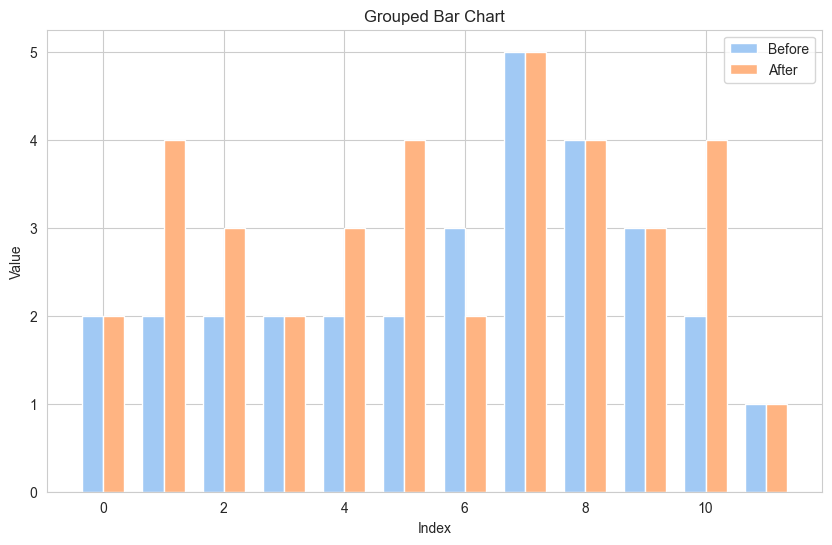

In [146]:
a= before_responses['How would you rate your understanding of language endangerment?']
# plt.hist(a, bins=10, alpha=0.5, label='Before', ax=axs[0])
b= after_responses['How would you rate your understanding of language endangerment?']

a.index = range(len(a))
b.index = range(len(b))

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define the x-axis positions
x = np.arange(len(a))

# Define the width of each bar
width = 0.35

# Plot the bars for 'a'
ax.bar(x - width/2, a, width, label='Before')

# Plot the bars for 'b'
ax.bar(x + width/2, b, width, label='After')

# Add labels, title, and legend
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('Grouped Bar Chart')
# ax.set_xticks(x)
# ax.set_xticklabels(x)
ax.legend()

#make horizontal line at y=1

# plt.plot(range(0, 12), [0]*12, color='black', linewidth=10)

# Show the plot
plt.show()
# plt.hist(b, bins=10, alpha=0.5, label='After', ax=axs[1])

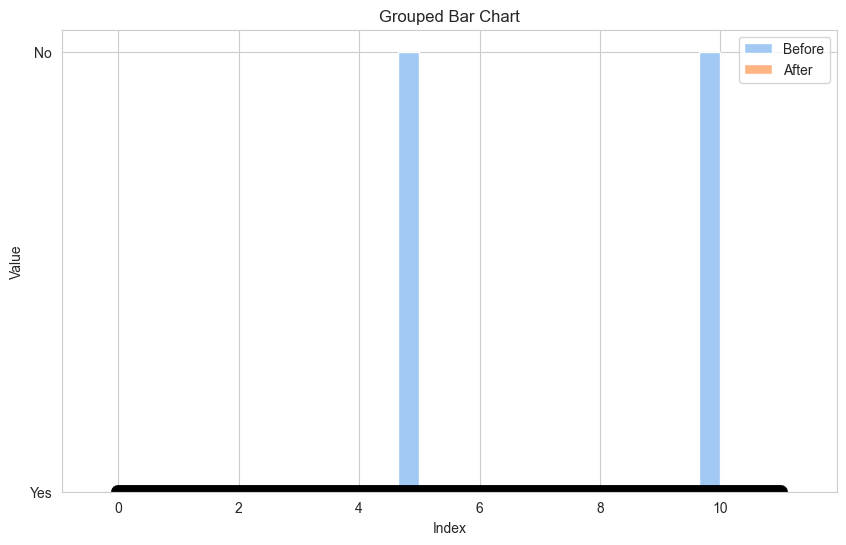

In [156]:
a= before_responses['Do you believe there are over 100 endangered languages in the United States?']
# plt.hist(a, bins=10, alpha=0.5, label='Before', ax=axs[0])
b= after_responses['Do you believe there are over 100 endangered languages in the United States?']

a.index = range(len(a))
b.index = range(len(b))

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define the x-axis positions
x = np.arange(len(a))

# Define the width of each bar
width = 0.35

# Plot the bars for 'a'
ax.bar(x - width/2, a, width, label='Before')

# Plot the bars for 'b'
ax.bar(x + width/2, b, width, label='After')

# Add labels, title, and legend
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('Grouped Bar Chart')
# ax.set_xticks(x)
# ax.set_xticklabels(x)
ax.legend()

#make horizontal line at y=1

plt.plot(range(0, 12), [0]*12, color='black', linewidth=10)

# Show the plot
plt.show()
# plt.hist(b, bins=10, alpha=0.5, label='After', ax=axs[1])